In [1]:
#Based on the following article
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [3]:
df = pd.read_csv('Z:\Kontogeorgakos\AUEB - Data Science\Karlis\eurobank_vk.txt')

In [4]:
df.head()

,Unnamed: 0,X,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents
0,126225.0,126225,0,0.453779,60,0,0.184218,7045.0,12,0,0,0,1.0
1,61250.0,61250,0,0.009243,63,0,0.087771,13500.0,12,0,1,0,1.0
2,86465.0,86465,0,0.603066,59,0,108.000000,NaN,5,0,0,0,0.0
3,4173.0,4173,0,0.727758,33,0,0.696857,1876.0,4,0,0,0,1.0
4,41747.0,41747,0,0.000000,35,0,0.581437,8306.0,4,0,3,0,2.0


In [5]:
df = df[df.columns[2:]] #discard unwanted fields

In [6]:
df.info() # Basic information on variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
SeriousDlqin2yrs                        5000 non-null int64
RevolvingUtilizationOfUnsecuredLines    5000 non-null float64
age                                     5000 non-null int64
NumberOfTime30.59DaysPastDueNotWorse    5000 non-null int64
DebtRatio                               5000 non-null float64
MonthlyIncome                           4002 non-null float64
NumberOfOpenCreditLinesAndLoans         5000 non-null int64
NumberOfTimes90DaysLate                 5000 non-null int64
NumberRealEstateLoansOrLines            5000 non-null int64
NumberOfTime60.89DaysPastDueNotWorse    5000 non-null int64
NumberOfDependents                      4872 non-null float64
dtypes: float64(4), int64(7)
memory usage: 429.8 KB


In [7]:
df.describe() #Basic Statistics

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4002.000000,5000.000000,5000.000000,5000.000000,5000.000000,4872.000000
mean,0.062600,4.143725,52.518000,0.392000,341.415724,6859.597701,8.479000,0.236000,1.021000,0.217000,0.756158
std,0.242266,110.409798,15.004356,3.966142,1020.784787,11680.177013,5.212811,3.943325,1.197182,3.927671,1.126956
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030574,41.000000,0.000000,0.162916,3346.250000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.156423,52.000000,0.000000,0.359641,5396.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579344,63.000000,0.000000,0.892560,8319.250000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,5451.000000,107.000000,98.000000,10773.000000,582369.000000,42.000000,98.000000,26.000000,98.000000,9.000000


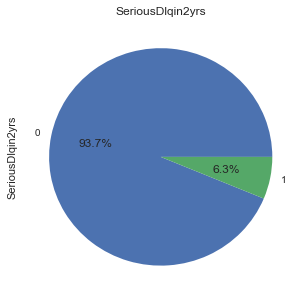

In [8]:
df['SeriousDlqin2yrs'].value_counts().plot(kind = 'pie',y = 'SeriousDlqin2yrs',figsize=(5, 5),title = 'SeriousDlqin2yrs',autopct='%1.1f%%')


In [9]:
df['RevolvingUtilizationOfUnsecuredLines_binned'] = pd.qcut(df["RevolvingUtilizationOfUnsecuredLines"],10,labels = range(1,11)).astype("str")

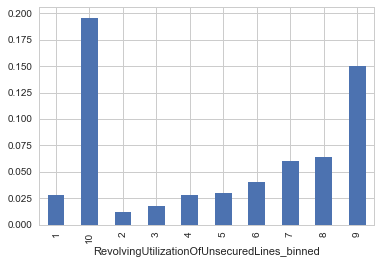

In [10]:
df.groupby(['RevolvingUtilizationOfUnsecuredLines_binned'])['SeriousDlqin2yrs'].mean().plot(kind='bar')

In [11]:
df['MonthlyIncome_binned'] = pd.qcut(df["MonthlyIncome"],10,labels = range(1,11))

In [12]:
df['MonthlyIncome_binned'] = df['MonthlyIncome_binned'].cat.add_categories(["-1"])

In [13]:
df['MonthlyIncome_binned'] = df['MonthlyIncome_binned'].fillna("-1").astype("str")



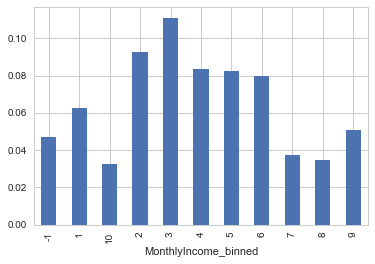

In [14]:
df.groupby(['MonthlyIncome_binned'])['SeriousDlqin2yrs'].mean().plot(kind='bar')

In [15]:
df['age_binned'] = pd.qcut(df["age"],10,labels = range(1,11)).astype("str")



In [16]:
df['DebtRatio_binned'] = pd.qcut(df["DebtRatio"],10,labels = range(1,11)).astype("str")

In [17]:
df['NumberOfOpenCreditLinesAndLoans_binned'] = pd.qcut(df["NumberOfOpenCreditLinesAndLoans"],10,labels = range(1,11)).astype("str")

In [18]:
def binF(x):
    if x == 0:
        z = "0"
    elif math.isnan(x):
        z = "-1"
    else:
        z = "1"
    return z

In [19]:
df['NumberOfTime30.59DaysPastDueNotWorse_binned'] = df["NumberOfTime30.59DaysPastDueNotWorse"].apply(binF)

In [20]:
df['NumberOfTimes90DaysLate_binned'] = df["NumberOfTimes90DaysLate"].apply(binF)

In [21]:
df['NumberOfTime60.89DaysPastDueNotWorse_binned'] = df["NumberOfTime60.89DaysPastDueNotWorse"].apply(binF)

In [22]:
df['NumberRealEstateLoansOrLines_binned'] = df["NumberRealEstateLoansOrLines"].apply(binF)

In [23]:
df["NumberOfDependents_binned"] = df["NumberOfDependents"].apply(binF).astype("str")

In [24]:
df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs'].astype('category')

In [25]:
#dummy variables
for col in df.columns[list(range(11,21))]:       
       if df[col].dtypes=='object':
            df = pd.get_dummies(df, prefix=col + '_', columns=[col])
    

In [26]:
cols = [0]+list(range(22,73))

df_final = df[df.columns[cols]]


In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_final[df_final.columns[1:]], df_final[df_final.columns[0]], test_size=0.25, random_state=0)



In [28]:
LR = LogisticRegression()

In [29]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print(classification_report(y_train,  LR.predict(x_train)))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97      3506
          1       0.61      0.17      0.26       244

avg / total       0.92      0.94      0.92      3750



In [31]:
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(LR.score(x_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.9389


In [32]:
y_pred = LR.predict(x_test)

In [33]:
print(classification_report(y_test,  LR.predict(x_test)))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1181
          1       0.50      0.14      0.22        69

avg / total       0.93      0.94      0.93      1250



In [34]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(LR.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9448


In [35]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1171   10]
 [  59   10]]


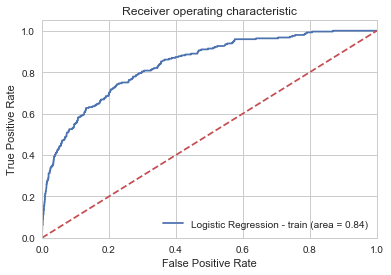

In [36]:
logit_roc_auc = roc_auc_score(y_train, LR.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, LR.predict_proba(x_train)[:,1])
auc_train = roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression - train (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

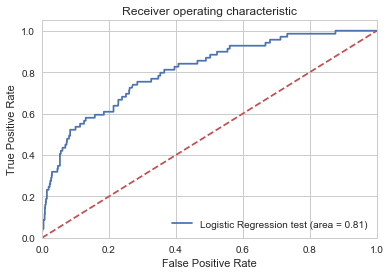

In [37]:
logit_roc_auc = roc_auc_score(y_test, LR.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])
auc_test = roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression test (area = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

